<img src="img/xilinx-jupyter.png"/>

Jupyter Notebook provides us a flexible experimentation environment.
Select any cell and click "Run". Click the square to stop if needed.

## Power Advantage Tool notebook 

This cell is a demo of the poweradvantage library.  

This generation of Power Advantage Tool has a few improvements over previous generations:  
(1) It is available as a library so it can be easily embedded into all demos and applications.  
(2) It can be run alongside your code, without you requiring to modify your project.  
(3) The Jupyter Notebook experimentation environment encourages customization and extension.  
  - Note it is only four lines of code.  <img style="float: right;" src="img/xilinx-kid.png">  
  - The same APIs support various kits, so your code can be portable.  
  - It is supported on the System Controller or the Main Device (with jupyter notebook).  
  - APIs give access to the data, so it can be presented as you like.  
  - Additional Python libraries can be installed!  
  - See below for more that you can do!  

Note: Domains/Totals only show Watts since they are composed of rails of different Voltages (invalid columns are dashed out).  

In [1]:
from poweradvantage import poweradvantage
pa = poweradvantage("VCK190", "SC")
pa.help()
p = pa.printpower()


poweradvantage rev 0.02
-------------- --- ----
pa          = poweradvantage(<name>, <module>) # Initialization
                                               # Board Names: VCK190, VMK180
                                               # Modules: "" Main Module, SC System Controller
pa          = poweradvantage("VCK190", "")     # Configure to be run on VCK190 Versal
pa          = poweradvantage("VCK190", "SC")   # Configure to be run on VCK190 System Controller
name        = pa.getname()                     # Get power rail names
description = pa.getdescription()              # Get power rail descriptions
domain      = pa.getdomain()                   # Get power rail domains
power       = pa.getpower()                    # Get power rail Volts, Amps, Watts
              pa.printpower()                  # Print the power
power       = pa.printpower()                  # Print the power and get the power
              pa.help()                        # Print these instructions

       

This cell is the Power Advantage Tool.  
Select the cell below and click "Run". Click the square to stop.

The Power Advantage Tool can run along with your application by launching its separate Jupyter Notebook on the main device.  
Or the Power Advantage Tool can run along with any application by launching it from the System Controller.  
This flexibility allows an unprescedented level of tools support with your design. <img style="float: right;" src="img/xilinx-bulb.png">

Please see below for more things you can do.

In [2]:
from poweradvantage import poweradvantage
import time
from IPython import display
pa = poweradvantage("VCK190", "SC")

while 1:
 display.clear_output(wait=True)
 pa.printpower()
 time.sleep(3)

                   Volts   Amps   Watts
          VADJ_FMC 0.004  0.0000  0.0000
        FMC Domain ----- -------  0.0000
          MGTYAVCC 0.877  0.6763  0.5934
          MGTYAVTT 1.204  0.0125  0.0150
        MGTYVCCAUX 1.495  0.0005  0.0007
Transceiver Domain ----- -------  0.6092
            VCCINT 0.784  2.7900  2.1867
            VCC1V8 1.802  0.0015  0.0027
            VCC3V3 3.325  0.0090  0.0299
            VCC1V2 1.199  0.0240  0.0288
            VCC1V1 1.099  0.0620  0.0681
           VCC_RAM 0.000  0.0000  0.0000
            VCCAUX 1.502  0.0065  0.0098
         PL Domain ----- -------  2.3260
           VCC_SOC 0.785  0.4100  0.3218
     System Domain ----- -------  0.3218
          VCC_PSFP 0.776  0.0280  0.0217
               FPD ----- -------  0.0217
          VCC_PSLP 0.780  0.0155  0.0121
               LPD ----- -------  0.0121
           VCC_PMC 0.776  0.1010  0.0784
          VCCO_MIO 1.800  0.1045  0.1881
        VCCAUX_PMC 1.501  0.0285  0.0428
        PMC Domai

KeyboardInterrupt: 

This cell shows how to make a custom presentation of the data.  
It does not use printpower, but uses getpower to get the data and plots it.  

With the flexibility of pandas dataframes, this code can be extended in many ways.  

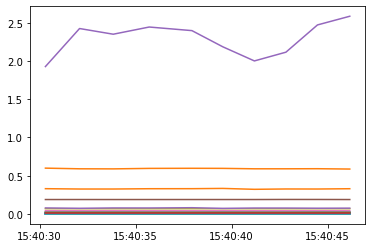

KeyboardInterrupt: 

In [3]:
from poweradvantage import poweradvantage
import time
from IPython import display
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pa = poweradvantage("VCK190", "SC")
df = pd.DataFrame()
name = pa.getname()

while 1:
 dt_object = datetime.fromtimestamp(datetime.timestamp(datetime.now()))
 power = pa.getpower()
 df0 = pd.DataFrame.from_records(zip(*power), columns=name, index=[0,0,dt_object])
 df = df.append(df0.iloc[[2]].copy())
 plt.plot(df.tail(10))
 display.clear_output(wait=True)
 plt.show()
 time.sleep(0.5)

This cell prints out the legend. This is a good starting project if you want to try doing it yourself from Python.

In [4]:
from poweradvantage import poweradvantage
pa = poweradvantage("VCK190", "SC")
for (n, do, d) in zip(pa.getname(), pa.getdomain(), pa.getdescription()):
    print("%18s  %18s  %s" % (n, do, d))

          VADJ_FMC          FMC Domain  FMC primary power supply
          MGTYAVCC  Transceiver Domain  GTY transceiver primary analog power supply
          MGTYAVTT  Transceiver Domain  GTY transceiver termination power supply
        MGTYVCCAUX  Transceiver Domain  GTY transceiver auxiliary analog Quad PLL (QPLL) power supply
            VCCINT           PL Domain  PL and AIE primary power supply
            VCC1V8           PL Domain  1.8V GPIO, UART, Sysctlr power supply
            VCC3V3           PL Domain  3.3V PCIE, HDMI, HDIO power supply
            VCC1V2           PL Domain  1.2V DDR4 termination supply
            VCC1V1           PL Domain  1.1V LPDDR4 termination supply
           VCC_RAM           PL Domain  RAM and clocking network power supply
            VCCAUX           PL Domain  Auxiliary power supply
           VCC_SOC       System Domain  NOC and DDR controller primary power supply
          VCC_PSFP                 FPD  PS Full-power domain power supply
    

In this concept of a developer's "experimentation environment" there are many things you can do: 

Easy:  <img style="float: right;" src="img/xilinx-bulb.png">  
(1) You can change the time.sleep(n) to sample faster or slower.  
(2) You can expand the plt.plot to display more than 10 values.  
(3) Try writing some Python code from the cells.
(4) Print out the descriptions of the rails.  
(5) Print out a legend of the rails containing the names and descriptions.  
(6) Run the Power Advantage Tool from System Controller with your design running on the main device.  
(7) Run the jupyter notebook on the main device (e.g. Targeted Reference Design) as well as the Power Advantage Tool.  

Moderate:  
(8) You can winscp into /usr/local/lib/python3.6/dist-packages/poweradvantage/poweradvantage.py to see how printpower is done. Then paste the code into your own program (changing self.getpower() to pa.getpower()).  
(9) Try only outputting the Domain Totals and net Total.  
(10) Try only outputting the Rails and total for a single Domain.
(11) Try turning the output into .csv format, and open as an Excel file.
(12) Automation is easy in Python. Try scripting a series of tasks.

Advanced:  <img style="float: right;" src="img/xilinx-bricks.png">  
(13) Try saving a .csv of your data in your jupyter folder.  
(14) Try saving a .csv of your data on your host machine.  
(15) Try varying the PL voltage and see what the power change is.  
(16) Try sending a GPIO to your design that spawns a task and see the power change.  
(17) Try sending a GPIO to your design that switches off a power domain and see the power change.  
(18) Try sending a JTAG EEMI command to the PMC that switches off a power domain and see the power change.  
(19) Run a cycle test on an operation and view or log the power.  
(20) Cycle through combinations of states to exhaustively power test every combination.  
(21) Prototype one function or state of your application, and measure its performance/power.

This cell is a one-time initialization. You must be connected to the internet (estimated run time 30 minutes).

In [5]:
import sys
!{sys.executable} -m pip install --trusted-host pypi.xilinx.com --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org pytest-xdist
!{sys.executable} -m pip install --trusted-host pypi.xilinx.com --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org --upgrade pip
!{sys.executable} -m pip install --trusted-host pypi.xilinx.com --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org python-periphery
!{sys.executable} -m pip install --trusted-host pypi.xilinx.com --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org numpy
!{sys.executable} -m pip install --trusted-host pypi.xilinx.com --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org pandas
!{sys.executable} -m pip install --trusted-host pypi.xilinx.com --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org matplotlib

  ERROR: Could not find a version that satisfies the requirement pytest-xdist (from versions: none)
ERROR: No matching distribution found for pytest-xdist
Requirement already up-to-date: pip in /usr/lib/python3.7/site-packages (19.2.3)
